# <a id='0'>Prueba Tecnica Magister: Titanic</h1>
![Titanic](http://c.files.bbci.co.uk/16D1/production/_100814850_gettyimages-877330410.jpg)

- ## <a href='#1'>1. Introduccion</a> 

<b></b>
- ##  <a href='#2'>2. Analisis Exploratorio de Datos (EDA)</a>

    - ###  <a href='#2.1.'>2.1. Limpieza de Datos</a>
    - ###  <a href='#2.2.'>2.2. Analisis de Datos</a>
        - ###  <a href ='#2.2.1.'>2.2.1. Chequeo de outliers</a>

<b></b>
- ##  <a href='#3'>3. Visualización de los Datos</a>

<b></b>

- ##  <a href='#4'>4. Conclusiones</a>
    - ###  <a href='#4.1.'>4.1. Sobre los Datos</a>
    - ###  <a href='#4.2.'>4.2. Futuros Pasos</a>

# <a id='1'>1. Introduction</a>

#### La siguiente investigación es sobre un conjunto de datos del Titanic suministrado por Magister.

Esta prueba consiste en analizar los datos y extraer información valiosa de ellos y reponder unas hipótesis planteadas.

El objetivo es aplicar algunas técnicas de limpieza de datos para crear una estructura de datos accesible para el equipo de Data Science, para que puedan aplicarle sus modelos.
Para lograrlo, los datos deben estar no solo limpios, sino también ordenados y coherentes.

#### La fecha límite es *8 de junio de 2022*

### Si necesitas contactarme, no tengas miedo:
* Email: **jamr1989@gmail.com**
* Linkedin: **https://www.linkedin.com/in/juanmaniglia/**

### Revisa mi repositorio en Github: **https://github.com/juanmaniglia/Prueba_Tecnica_Magister/**

# <a id='2'>2. Analisis Exploratorio de Datos (EDA)</a> 

### Visión general

Nuestros datos consisten en:
 * Un dataframe con datos del `titanic` dividido en tres los cuales tienen por nombre `train.csv`, `test.csv` y `gender_submission.csv`
    - Este tipo de formato es para competiciones de Kaggle asi que en principio vamos a utilizar el `train.csv` para realizar el EDA. 

Las hipotesis que se plantearan en principio seran las del reto propuesto.

- ¿Cuántas personas iban en el titanic?
- ¿Cuántos hombres y mujeres sobrevivieron?
- ¿Cuál fue el top 10 de edad que más sobrevieron y el top 10 de edad que no lo lograron?
- ¿Cuántos cargos o títulos iban en el barco? Ejemplo: Capitanes, Mrs. Miss, etc. (pista: usa expresiones regulares)
- ¿Cuánto es la sumatoria del valor de los tickets en EUR? (pista: los tickets se vendieron en libras esterlinas)

In [229]:
# Importar las librerias necesarias
######## PYTHON MODULES ########
# Data analisis
import pandas as pd
import numpy as np
import re

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings (ignorar)
import warnings
warnings.filterwarnings("ignore")

## <a id='2.1.'>2.1. Limpieza de Datos</a> 

Lo primero que se realiza es la carga de datos en este caso los dataframe `train.csv`

In [63]:
titanic = pd.read_csv('data/processed/train.csv')

Se muestran la estructura del dataset cargado para ver las variables

In [64]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C


Se procedera a reviar la calidad de los datos asi como tambien ver la cantidad de datos faltantes, las correlacion entre variables y la distribucion de los mismos  

In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Se puede observar que tenemos una gran cantidad de datos faltantes en la columna `Age` y la columna `Cabin` y unos pocos en la variabel `Embarked`

In [66]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


En la tabla anterior podemo notar varias cosas como por ejemplo que la edad minima es `0.42` la maxima `80` y el promedio es de `29.69` a falta de la limpieza, que la columna `Survived` aunque tenga valores numerico es una variable booleana (0 para no y 1 para si), la columa `PassengerId` es una variable continua el cual indica el id del pasajero, la columna `Pclass` es la que determina la clase donde estuvo el pasajero con lo cual podemos decir que es una variable categorica, `SibSp` es la cantidad de hermanos que tenia cada pasajero y `Parch` la cantidad de familia que tenía a bordo, `Fare` es el coste del ticket que tenemos un minio de `0.0` un maximo de `512.32` y una media de `32.20`

<AxesSubplot:>

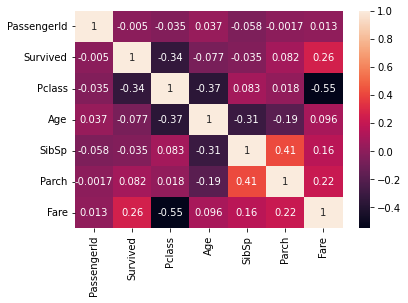

In [67]:
sns.heatmap(titanic.corr(),annot=True)

En el grafico anterior podemos notar las correlaciones podemos ver que no se incluyen todas las variables porque no todas son numericas pero podemos notar que existen correlaciones negativas entre `Survived` y `Pclass` lo que nos indica que entre mas baja la clase (mas baja la clase mayor es el numero) menos sobrevivientes hay. tambien podemos observar una correlacion obvia que es entre mayor sea el numero de hermanos mas parientes tiene. las demos correlaciones no estan muy claras asi que las analizaremos mas adelante 

La limpieza de los datos es fundamental a la hora de hacer un analis por lo cual vamos a comenzar tratando los valores nulos.

vamos a tratar los nulos de `Embarked`

In [68]:
puertos = list(titanic['Embarked'].unique())
print(f'Los puertos donde embarcaron son: {puertos}')

Los puertos donde embarcaron son: ['S', 'C', 'Q', nan]


los puerto son `S` de Southampton, `C` de Cherbourg, y `Q` de Queenstown el valor `nan` es un valor vacio o faltante que tenemos que tratar.

los valores faltantes se encuentran de la siguiente forma

In [69]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


al ser solo dos valores podemos adjudicarlos al puerto que mas tenga

In [70]:
titanic.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


siendo `S` el puerto con mas pasajeros embarcados procedemos a adjudicarselos.

In [71]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

Se procede a tratar los valores faltantes en la columna `Age`

In [76]:
edades_faltantes = len(titanic[titanic['Age'].isna()])
print(f'Hay {edades_faltantes} valores faltantes')

Hay 177 valores faltantes


podemos tratarlo de diferentes formas por ejemplo la media o la mediana pero la forma mas correcta de tratarla seria imputarle la media por clase

In [87]:
titanic.groupby('Pclass').median()[['Age']]

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [99]:
def rellenar_edad(fila):
    if fila['Pclass'] == 1:
        edad = 37.0
    elif fila['Pclass'] == 2:
        edad = 29.0
    elif fila['Pclass'] == 3:
        edad = 24.0
    return edad

edades_faltantes = titanic['Age'].isna()
titanic.loc[edades_faltantes, 'Age'] = titanic[edades_faltantes].apply(lambda fila: rellenar_edad(fila), axis=1)

solo quedarian los NaNs de la columna `Cabin`

In [102]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [118]:
cabinas_faltantes = len(titanic[titanic['Cabin'].isna()])
print(f'Hay {cabinas_faltantes} valores faltantes lo que representa el {round((cabinas_faltantes/len(titanic))*100,2)}%')

Hay 687 valores faltantes lo que representa el 77.1%


al ser valores no consecutivos y no tener la distribucion del barco se vuelve dificil poder separarlos por lo cual eliminaremos la columna `Cabin`

In [119]:
df = titanic.drop('Cabin',axis=1)

ya se han tratado todos los NaNs

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [123]:
df.to_pickle('data/processed/titanic.pkl')

## <a id='2.2.'>2.2. Analisis de Datos</a> 

In [179]:
titanic = pd.read_pickle('data/processed/titanic.pkl')
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,S
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,S
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S


### ¿Cuantas personas iban en el titanic?

In [180]:
titanic.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [181]:
print(f'En el Titanic iban {len(titanic)}')

En el Titanic iban 891


### ¿Cuántos hombres y mujeres sobrevivieron?

In [182]:
supervivientes = titanic['Survived'].sum()
print(f'Sobrevivieron {supervivientes} personas')

Sobrevivieron 342 personas


de los cuales

In [183]:
titanic.groupby(['Sex']).sum()[['Survived']]

,Survived
Sex,
female,233
male,109


### ¿Cuál fue el top 10 de edad que más sobrevieron y el top 10 de edad que no lo lograron?

Las edades que mas sobrevivieron son

In [184]:
titanic_suvirved = titanic[titanic['Survived']==1][['Survived','Age']]
titanic_suvirved.groupby('Age').sum().sort_values('Survived', ascending=False).head(10)

,Survived
Age,
24.0,49
37.0,15
29.0,12
36.0,11
35.0,11
22.0,11
27.0,11
30.0,10
19.0,9


y las que menos

In [185]:
titanic_suvirved.groupby('Age').sum().sort_values('Survived', ascending=True).head(12)

,Survived
Age,
0.42,1
55.00,1
53.00,1
47.00,1
43.00,1
32.50,1
12.00,1
11.00,1
7.00,1


se tomaron los 12 primeros porque son todas edades con una sola muerte 

### ¿Cuántos cargos o títulos iban en el barco? Ejemplo: Capitanes, Mrs. Miss, etc. (pista: usa expresiones regulares)

In [262]:
titanic[['Surname','Title and Name']]=titanic['Name'].str.split(', ',expand=True)

In [264]:
titanic['Title'] = titanic['Title and Name'].apply(lambda x: re.split('([A-Z][a-z]+)\.',x)[1])

In [266]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname,Title and Name,Title
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,S,Pekoniemi,Mr. Edvard,Mr
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,C,Ringhini,Mr. Sante,Mr
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,S,Osman,Mrs. Mara,Mrs
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,S,Andersson,Miss. Ebba Iris Alfrida,Miss
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,S,Bystrom,Mrs. (Karolina),Mrs


In [276]:
titulos_unicos = len(titanic['Title'].unique())
print(f'Entre los pasajeros habian {titulos_unicos} titulos unicos')

Entre los pasajeros habian 17 titulos unicos


distribuidos de la siguiente manera

In [273]:
titanic.groupby('Title')[['Title']].count()

,Title
Title,
Capt,1
Col,2
Countess,1
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40


### ¿Cuánto es la sumatoria del valor de los tickets en EUR? (pista: los tickets se vendieron en libras esterlinas)

### <a id ='2.2.1.'>2.2.1. Chequeo de outliers</a>

#  <a id='3'>3. Visualización de los Datos</a>

# <a id='4'>4. Conclusiones</a>

###  <a id='4.1.'>4.1. Sobre los Datos</a>

###  <a id='4.2.'>4.2. Futuros Pasos</a>

## <a href ='#0'>Go back to the top</a>